# Week 8 Machine Learning Homework

## Instructions
Complete all exercises below by writing code in the cells provided. Focus on implementing and understanding the sigmoid function and evaluation metrics.

---

### Exercise 1: Sigmoid Function Implementation

Implement the sigmoid function from scratch and visualize it.

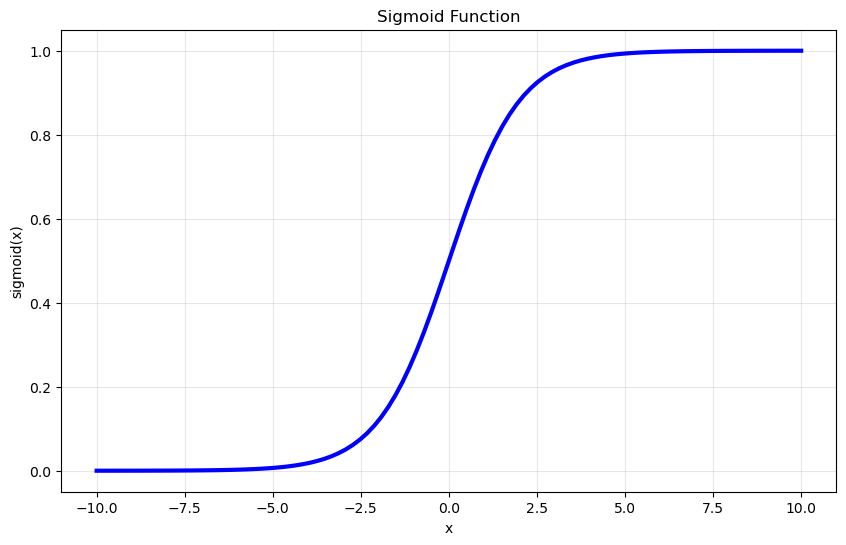

Sigmoid function test:
x=-5, sigmoid=0.0066928509242848554
x=-2, sigmoid=0.11920292202211755
x=0, sigmoid=0.5
x=2, sigmoid=0.8807970779778825
x=5, sigmoid=0.9933071490757153


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Implement the sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid function for input x

    Parameters:
    x: input value or array

    Returns:
    sigmoid of x
    """
    # Your code here
    return 1/(1+np.exp(-x))

# Generate x values from -10 to 10
x_values = np.linspace(-10, 10, 100)

# TODO: Compute sigmoid values for x_values
y_values = sigmoid(x_values)

# TODO: Create a plot of the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linewidth=3, color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True, alpha=0.3)
plt.show()

# TODO: Test your implementation with specific values
test_values = [-5, -2, 0, 2, 5]
print("Sigmoid function test:")
for val in test_values:
    print(f"x={val}, sigmoid={sigmoid(val)}")

### Exercise 2: Logistic Regression Probability Calculation

Use the sigmoid function to calculate class probabilities.

In [6]:
# Sample feature values and model coefficients
feature1 = 1.5
feature2 = -0.8
bias = 0.5
coef1 = 0.8
coef2 = -0.3

# TODO: Calculate the linear combination z
z = bias + coef1+feature1 + coef2+feature2

# TODO: Use sigmoid to calculate probability of class 1
probability = sigmoid(z)

print(f"Linear combination z: {z:.4f}")
print(f"Probability of class 1: {probability:.4f}")

# TODO: Based on a threshold of 0.5, make a prediction
prediction = 1 if probability >= 0.5 else 0
print(f"Predicted class: {prediction}")

# TODO: Create a function that takes features, coefficients, and bias
# and returns both probability and prediction
def predict_probability(features, coefficients, bias, threshold=0.5):
    """
    Calculate probability and prediction using sigmoid function
    """
    z = bias + sum(c*f for c, f in zip(coefficients, features))
    prob = sigmoid(z)
    pred = 1 if prob >= threshold else 0
    return prob, pred

# Test the function
test_features = [1.5, -0.8]
test_coefficients = [0.8, -0.3]
test_bias = 0.5

prob, pred = predict_probability(test_features, test_coefficients, test_bias)
print(f"\nTest - Probability: {prob:.4f}, Prediction: {pred}")

Linear combination z: 1.7000
Probability of class 1: 0.8455
Predicted class: 1

Test - Probability: 0.8744, Prediction: 1


### Exercise 3: Confusion Matrix Implementation

Implement a confusion matrix calculation from scratch.

Confusion Matrix Components:
True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1


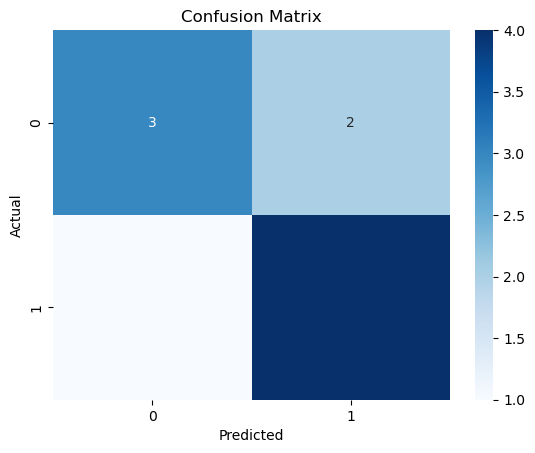

In [10]:
# Sample true labels and predictions
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# TODO: Calculate TP, TN, FP, FN from scratch
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate confusion matrix components
    """
    TP = TN = FP = FN = 0
    for actual, predicted in zip(y_true, y_pred):
        if actual == 1 and predicted == 1:
            TP += 1
        if actual == 0 and predicted == 0:
            TN += 1
        if actual == 0 and predicted == 1:
            FP += 1
        if actual == 1 and predicted == 0:
            FN += 1
            
    return TP, TN, FP, FN

# TODO: Test your function
TP, TN, FP, FN = calculate_confusion_matrix(y_true, y_pred)

print("Confusion Matrix Components:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# TODO: Create a visualization of the confusion matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

conf_matrix = np.array([[TN, FP], [FN, TP]])

sns.heatmap(conf_matrix, annot= True, fmt= '.0f', cmap= 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Exercise 4: Classification Metrics Calculation

Implement accuracy, precision, recall, and F1-score from scratch.


In [11]:
# TODO: Implement classification metrics using confusion matrix components
def calculate_metrics(TP, TN, FP, FN):
    """
    Calculate classification metrics from confusion matrix components
    """
    accuracy = precision = recall = f1 = 0

    # Your code here
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    # F1-score
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0

    return accuracy, precision, recall, f1

# TODO: Calculate metrics using the confusion matrix from Exercise 3
accuracy, precision, recall, f1 = calculate_metrics(TP, TN, FP, FN)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Classification Metrics:
Accuracy: 0.7000
Precision: 0.6667
Recall: 0.8000
F1-Score: 0.7273
